In [1]:
import torch

# Initial values
mem = torch.tensor([0.95, 0.85, 0.91])  # Membrane potentials
input_ = torch.tensor([0.2, 0.3, 0.1])  # Input currents
gamma = 0.5  # Example value for gamma
dt = 1  # Example value for dt

# Calculate spikes
spk = (mem > 0.9).float()  # [1, 0, 1]

# Initialize `trigger_tensor` as a tensor of ones
trigger_tensor = torch.ones_like(mem)  # [1, 1, 1]

# Update `trigger_tensor`
trigger = torch.ones_like(mem)  # [1, 1, 1]
trigger_tensor = torch.where(spk > 0, trigger, trigger_tensor)  # [1, 0, 1]

# Update membrane potential
updated_mem_due_to_trigger = torch.where(
    trigger_tensor > 0,
    torch.max(0.1 * torch.ones_like(mem), mem - mem * gamma * input_ * dt), 
    torch.zeros_like(mem)
)

# Manage `trigger_tensor` state
trigger_tensor = torch.where(updated_mem_due_to_trigger > 0.1, 
                             trigger_tensor, 
                             torch.zeros_like(trigger_tensor))

print("Updated Membrane Potentials:", updated_mem_due_to_trigger)
print("Updated Trigger Tensor:", trigger_tensor)


Updated Membrane Potentials: tensor([0.8550, 0.7225, 0.8645])
Updated Trigger Tensor: tensor([1., 1., 1.])


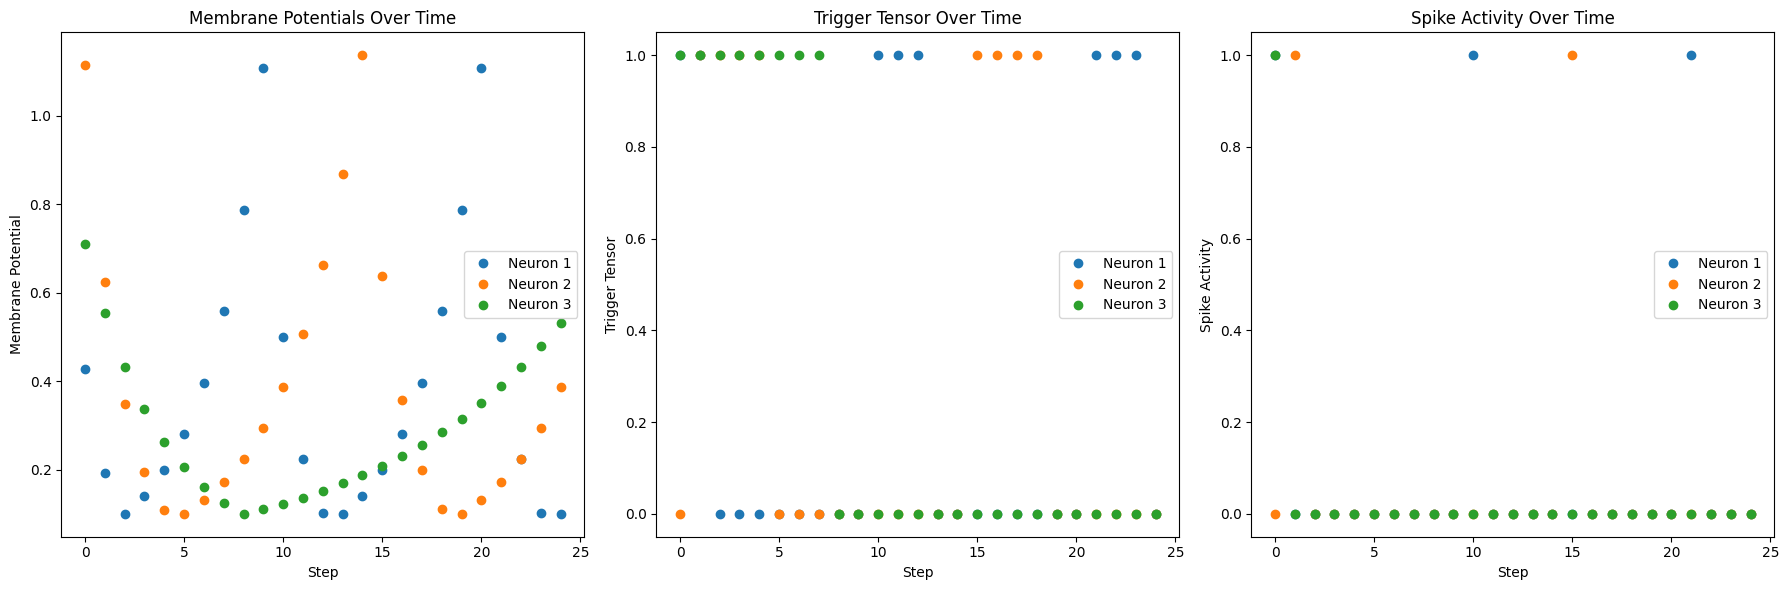

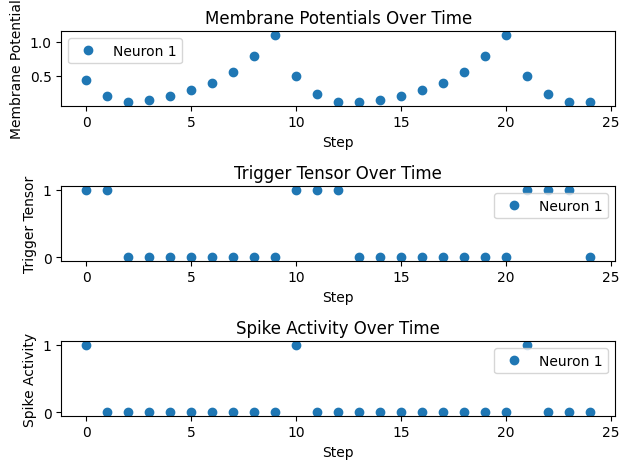

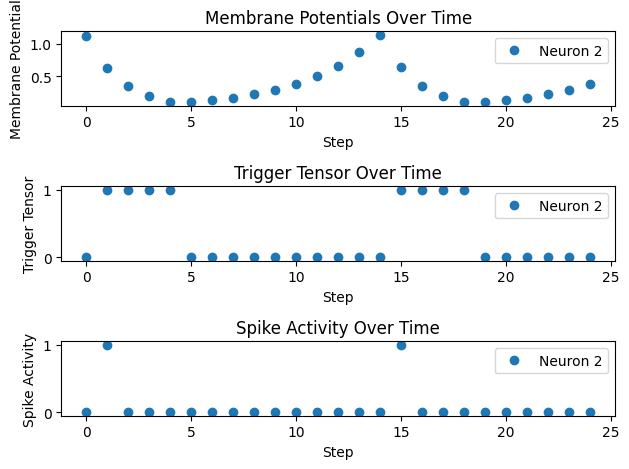

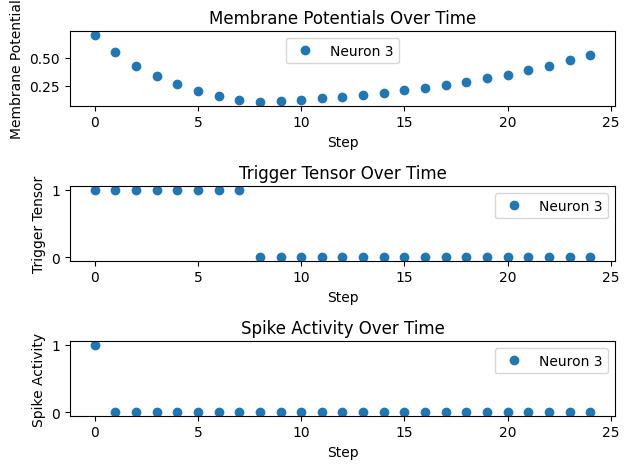

In [3]:
import torch
import matplotlib.pyplot as plt

# Initialize parameters
mem = torch.tensor([0.95, 0.85, 0.91])  # Membrane potentials
input_ = torch.tensor([0.5, 0.4, 0.2])  # Input currents
gamma = 1.1  # Example value for gamma
alpha = 1
beta = 0.09
dt = 1  # Example value for dt
steps = 25  # Number of simulation steps

# Initialize lists to store values for plotting
memories = []
triggers = []
spikes = []

# Initialize `trigger_tensor` as a tensor of ones
trigger_tensor = torch.zeros_like(mem)  # [1, 1, 1]

for step in range(steps):
    # Calculate spikes
    spk = (mem > 0.9).float()  # [1, 0, 1]
    
    # Store spike values for plotting
    spikes.append(spk.numpy())

    # Update `trigger_tensor`
    trigger = torch.ones_like(mem)  # [1, 1, 1]
    trigger_tensor = torch.where(spk > 0, trigger, trigger_tensor)  # [1, 0, 1]

    # Update membrane potential
    updated_mem_due_to_trigger = torch.where(
        trigger_tensor > 0,
        torch.max(0.1 * torch.ones_like(mem), mem - mem * gamma * input_ * dt), 
        torch.zeros_like(mem)
    )
    
    # Store values for plotting


    
    # Update `mem` and `trigger_tensor` for next step
    mem = torch.where(trigger_tensor > 0, torch.max(0.1 * torch.ones_like(mem), mem - mem * gamma * input_ * dt), mem + mem * (input_ * alpha - beta) * dt)

    trigger_tensor = torch.where(mem > 0.1, trigger_tensor, torch.zeros_like(trigger_tensor))
    memories.append(mem.numpy())
    triggers.append(trigger_tensor.numpy())

# Convert lists to tensors for easier plotting
memories = torch.tensor(memories)
triggers = torch.tensor(triggers)
spikes = torch.tensor(spikes)

# Plotting
plt.figure(figsize=(18, 6))

# Plot membrane potentials
plt.subplot(1, 3, 1)
for i in range(memories.shape[1]):
    plt.plot(memories[:, i],'o', label=f'Neuron {i+1}')
plt.xlabel('Step')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potentials Over Time')
plt.legend()

# Plot trigger tensor
plt.subplot(1, 3, 2)
for i in range(triggers.shape[1]):
    plt.plot(triggers[:, i],'o', label=f'Neuron {i+1}')
plt.xlabel('Step')
plt.ylabel('Trigger Tensor')
plt.title('Trigger Tensor Over Time')
plt.legend()

# Plot spikes
plt.subplot(1, 3, 3)
for i in range(spikes.shape[1]):
    plt.step(range(steps), spikes[:, i],'o',  label=f'Neuron {i+1}', where='post')
plt.xlabel('Step')
plt.ylabel('Spike Activity')
plt.title('Spike Activity Over Time')
plt.legend()

plt.tight_layout()
plt.show()




# Plot membrane potentials
for i in range(memories.shape[1]):
    # Plotting

    plt.subplot(3, 1, 1)

    plt.plot(memories[:, i],'o', label=f'Neuron {i+1}')
    plt.xlabel('Step')
    plt.ylabel('Membrane Potential')
    plt.title('Membrane Potentials Over Time')
    plt.legend()

    # Plot trigger tensor
    plt.subplot(3, 1, 2)
    plt.plot(triggers[:, i],'o', label=f'Neuron {i+1}')
    plt.xlabel('Step')
    plt.ylabel('Trigger Tensor')
    plt.title('Trigger Tensor Over Time')
    plt.legend()

    # Plot spikes
    plt.subplot(3, 1, 3)

    plt.step(range(steps), spikes[:, i],'o',  label=f'Neuron {i+1}', where='post')
    plt.xlabel('Step')
    plt.ylabel('Spike Activity')
    plt.title('Spike Activity Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

